<a href="https://colab.research.google.com/github/dojian/classML/blob/main/01_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1

### <span style="color:chocolate"> Submission requirements </span>

Additional points may be deducted if these requirements are not met:
    
* Comment your code
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own
* Be sure your submitted notebook includes the output of your run (Hint: go to Kernel -> Restart Kernel and Run All Cells...)
* Try and minimize the use of the global namespace (meaning, keep things inside functions)
* Upload your .ipynb file to Gradescope when done
---

In [17]:
# Import the libraries we'll use below.
import numpy as np
import matplotlib.pyplot as plt

## Data as matrices
Data usually comes in the form of matrices. The Python Numpy library makes it easy to manipulate matrices efficiently. See the [Numpy Tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html) for details.

In [18]:
# Print these to make sure you understand what is being generated.
A = np.array([1, 2, 3])
B = np.arange(1, 13).reshape(3, 4)
C = np.ones((2, 3))
D = np.eye(3)
print(A)
print(B)
print(C)
print(D)

[1 2 3]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[1. 1. 1.]
 [1. 1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


---
### Exercise 1: Matrix manipulation (25 points)

Perform the following computations using numpy functions and <span style="color:chocolate">print</span> the results. Note that the `*` operator implies matrix multiplication  (typically denoted using dot notation in linear algebra) -- make sure the dimensions align!
1. 2A + 1
2. Sum the rows of B (Hint: pass axis=1 to the cooresponding sum function)
3. Sum the columns of B (Hint: pass axis=0 to the cooresponding sum function)
4. Number of elements of B greater than 5
5. C + C
6. A * B

In [19]:
# 1. 2A+1
print(2*A+1)


[3 5 7]


In [20]:
# 2. Sum the rows of B (Hint: pass axis=1 to the cooresponding sum function)
print(B.sum(axis=1))

[10 26 42]


In [21]:
#3. Sum the columns of B (Hint: pass axis=0 to the cooresponding sum function)
print(B.sum(axis=0))

[15 18 21 24]


In [22]:
#4. Number of elements of B greater than 5
np.sum(B>5)

7

In [23]:
#5. C + C
C + C

array([[2., 2., 2.],
       [2., 2., 2.]])

In [24]:
#6. A * B
A.reshape(1,3)@B

array([[38, 44, 50, 56]])

---

## Data for Supervised Learning
Supervised learning is all about learning to make predictions: given an input $x$ (e.g. home square footage), can we produce an output $\hat{y}$ (e.g. estimated value) as close to the actual observed output $y$ (e.g. sale price) as possible. Note that the "hat" above $y$ is used to denote an estimated or predicted value.

Let's start by generating some artificial data. We'll create a vector of inputs, $X$, and a corresponding vector of target outputs $Y$. In general, we'll refer to invidual examples with a lowercase ($x$), and a vector or matrix containing multiple examples with a capital ($X$).

In [25]:
def create_1d_data(num_examples=10, w=2, b=1, random_scale=1):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    random_scale: add uniform noise between -random_scale and +random_scale

  Returns:
    X and Y with shape (num_examples)
  """
  X = np.arange(num_examples)
  np.random.seed(4)  # consistent random number generation
  deltas = np.random.uniform(low=-random_scale, high=random_scale, size=X.shape)
  Y = b + deltas + w * X
  return X, Y

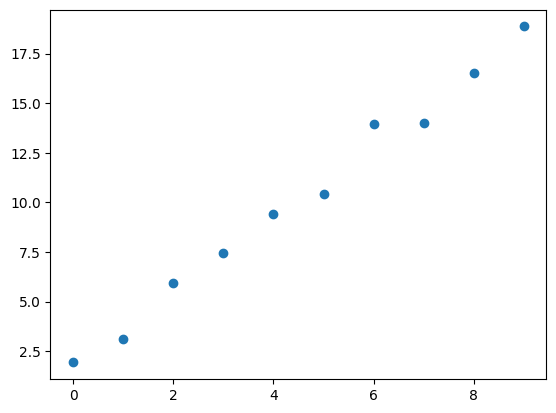

In [26]:
# Create some artificial data using create_1d_data.
X, Y = create_1d_data()
plt.scatter(X, Y)
plt.show()

---
### Exercise 2: Models for Data (25 points)

A model is a function that takes an input $x$ and produces a prediction $\hat{y}$.

Let's consider two possible models for this data:
1. $M_1(x) = x+5$
2. $M_2(x) = 2x+1$

Compute the predictions of models $M_1$ and $M_2$ for the values in $X$. These predictions should be vectors of the same shape as $Y$. Then plot the prediction lines of these two models overlayed on the "observed" data $(X, Y)$. Use [plt.plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) to draw the lines. Note: you will generate only one plot. Make sure to include axes, titles and legend.

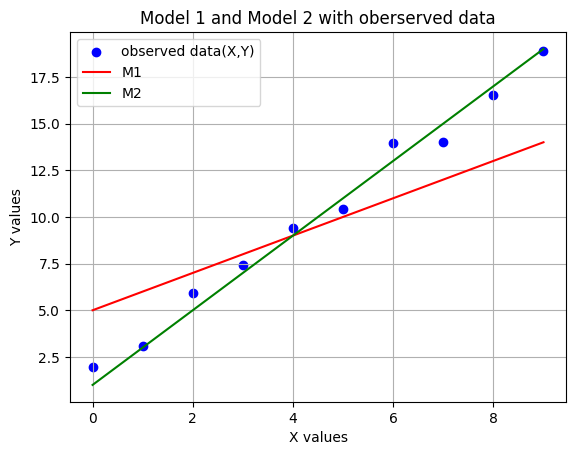

In [27]:
#compute the predictions
M1 = X+5
M2 = 2*X + 1

#plot
plt.scatter(X,Y, color = 'blue', label ='observed data(X,Y)')
plt.plot(X,M1, color = 'red', label ='M1')
plt.plot(X,M2, color = 'green', label ='M2')

#add axes, titles and legend
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Model 1 and Model 2 with oberserved data')
plt.legend()
plt.grid(True)

plt.show()

---

## Evaluation Metrics

How good are our models? Intuitively, the better the model, the more closely it fits the data we have. That is, for each $x$, we'll compare $y$, the true value, with $\hat{y}$, the predicted value. This comparison is often called the *loss* or the *error*. One common such comparison is *squared error*: $(y-\hat{y})^2$. Averaging over all our data points, we get the *mean squared error*:

\begin{equation}
\textit{MSE} = \frac{1}{n} \sum_{y_i \in Y}(y_i - \hat{y}_i)^2
\end{equation}

---
### Exercise 3: Computing MSE (25 points)

Write a function for computing the MSE metric and use it to compute the MSE for the two models above, $M_1$ and $M_2$.

In [28]:
def MSE(true_values, predicted_values):
  """Return the MSE between true_values and predicted values."""
  se=(true_values - predicted_values)**2
  total_se= np.sum(se)
  num_se = se.size
  return total_se/num_se


In [29]:
print ('MSE for M1:', MSE(Y, M1))
print ('MSE for M2:', MSE(Y, M2))

MSE for M1: 6.839502909434264
MSE for M2: 0.45821672338761366


---

## Generalization

Our data $(X, Y)$ represents just a sample of all possible input-output pairs we might care about. A model will be useful to the extent we can apply it to new inputs. Consider the more complex model below, which appears to produce a much smaller mean squared error.

MSE for M3: 0.10941956925521772


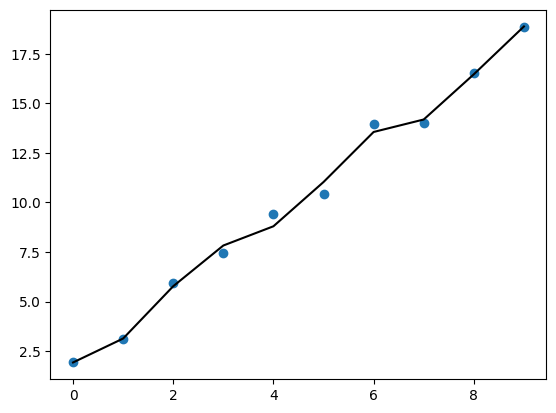

In [30]:
# Fit an 8-th degree polynomial to (X, Y). See np.polyfit for details.
polynomial_model_coefficients = np.polyfit(X, Y, deg=8)
polynomial_model = np.poly1d(polynomial_model_coefficients)
M3 = polynomial_model(X)
fig = plt.scatter(X, Y)
plt.plot(X, M3, '-k')
print ('MSE for M3:', MSE(Y, M3))

---
### Exercise 4: Generalization (25 points)

Explain whether you expect $M_3$ to be better than $M_2$ at predicting the labels for new unseen inputs.

*Writen answer:* It depends, and it is better to check using test data. M3 might be a better model if the relationship between X and Y is truely complex and non-linear. However, M3 could be over-fitting if the true relationship is linear and the 8th-degree polynominal simply capture its noise and outliers in the training data but not learn the true distribution. If the true relationship is more linear, M2 will be a better model at predicting the labels for new unseen inputs.

---

## Review

* In **Supervised Machine Learning**, we must start with data in the form $(X,Y)$ where $X$ are the inputs and $Y$ are the output labels.
* A **model** is a function that maps an input $x$ to an output $y$. The model's output is referred to as a **prediction**, denoted by $\hat{y}$.
* We **evaluate** predictions by comparing them to the true labels. This measurement is called a **loss** or **error**. For real-valued data, **mean squared error** is a common metric.
* A model is only as good as its ability to **generalize** to new examples.